# Assignment 1: Mental Health Data Visualisation

This notebook generates the three plots required for the assignment.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a simple style
sns.set_theme(style="whitegrid")

# Load Datasets
dreaddit_path = 'dreaddit.csv'
tech_path = 'mh_in_tech_2016.csv'

df_micro = pd.read_csv(dreaddit_path)
df_macro = pd.read_csv(tech_path)

print("Datasets loaded successfully.")

Datasets loaded successfully.


## Plot 1: The Silent Majority (Macro)
**Purpose:** Establish the landscape. Visualizing treatment rates in the tech industry.


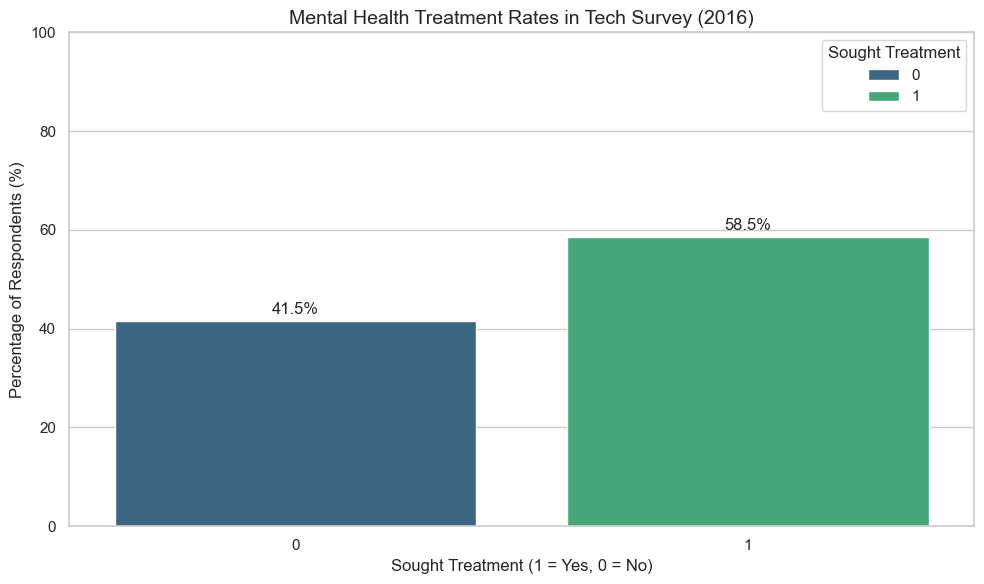

In [2]:
plt.figure(figsize=(10, 6))

treatment_col = 'Have you ever sought treatment for a mental health issue from a mental health professional?'

# Calculate counts and percentages
count_data = df_macro[treatment_col].value_counts(normalize=True).reset_index()
count_data.columns = ['Sought Treatment', 'Percentage']
count_data['Percentage'] = count_data['Percentage'] * 100

# Create bar plot
ax = sns.barplot(data=count_data, x='Sought Treatment', y='Percentage', palette='viridis', hue='Sought Treatment')

plt.title('Mental Health Treatment Rates in Tech Survey (2016)', fontsize=14)
plt.ylabel('Percentage of Respondents (%)')
plt.xlabel('Sought Treatment (1 = Yes, 0 = No)')
plt.ylim(0, 100)

# Add value labels using ax.containers for precise placement
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=12)

plt.tight_layout()
plt.savefig('plot1_macro.png')
plt.show()

## Plot 2: The Language of Distress (Micro)
**Purpose:** Reveal nuance. Analysing linguistic/sentiment differences across mental health subreddits.


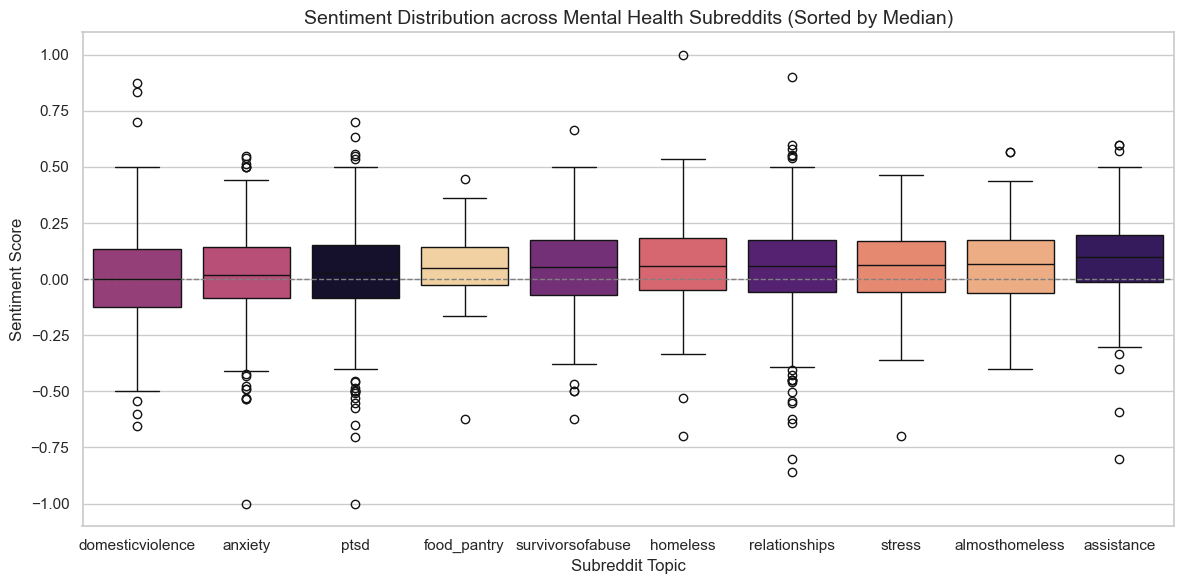

In [3]:
plt.figure(figsize=(12, 6))

# Comparing Sentiment Polarity across Subreddits
# 'sentiment' column: -1 (Negative) to 1 (Positive)
# Order by median sentiment for better readability
order = df_micro.groupby('subreddit')['sentiment'].median().sort_values().index

sns.boxplot(data=df_micro, x='subreddit', y='sentiment', order=order, hue='subreddit', palette='magma', legend=False)

plt.title('Sentiment Distribution across Mental Health Subreddits (Sorted by Median)', fontsize=14)
plt.xlabel('Subreddit Topic')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='grey', linestyle='--', linewidth=1, label='Neutral Sentiment')

plt.tight_layout()
plt.savefig('plot2_micro.png')
plt.show()

## Plot 3: The Safety Net (Actionable)
**Purpose:** Define target intervention. Do employer benefits correlate with comfort in discussing mental health?


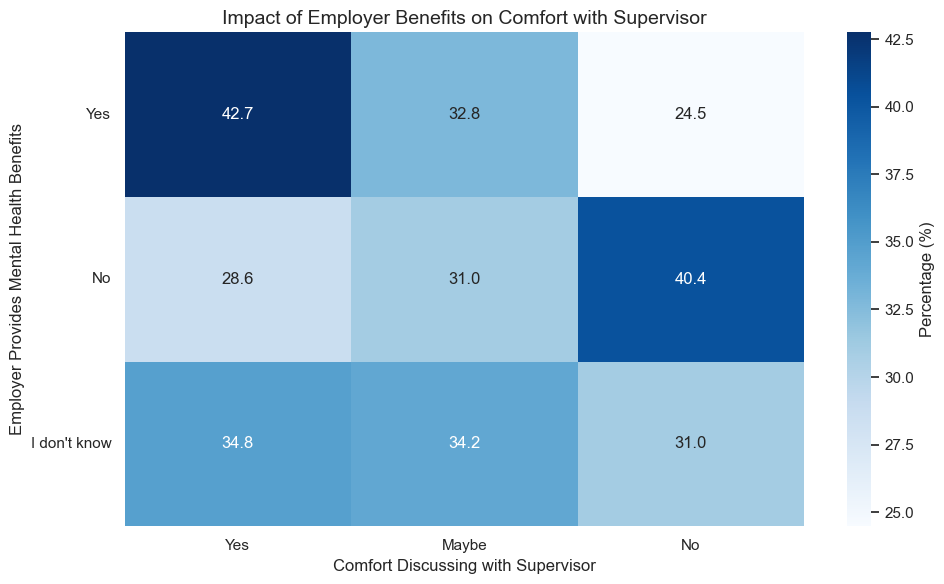

In [4]:
benefits_col = 'Does your employer provide mental health benefits as part of healthcare coverage?'
comfort_col = 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'

# Filter relevant responses
relevant_benefits = ['Yes', 'No', "I don't know"]
df_filtered = df_macro[df_macro[benefits_col].isin(relevant_benefits)].copy()

# Calculate percentage of comfort levels within each benefits category
ct = pd.crosstab(df_filtered[benefits_col], df_filtered[comfort_col], normalize='index') * 100

# Reorder indices for logical flow: Yes -> No -> I don't know
ct = ct.reindex(['Yes', 'No', "I don't know"])
# Reorder columns if necessary (Yes, Maybe, No) - assuming these are the values
comfort_order = ['Yes', 'Maybe', 'No']
ct = ct[comfort_order]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Percentage (%)'})

plt.title('Impact of Employer Benefits on Comfort with Supervisor', fontsize=14)
plt.xlabel('Comfort Discussing with Supervisor')
plt.ylabel('Employer Provides Mental Health Benefits')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('plot3_actionable.png')
plt.show()